<a href="https://colab.research.google.com/github/financieras/dataframe/blob/main/2024/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/financieras/dataframe.git

Cloning into 'dataframe'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 114 (delta 61), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 935.81 KiB | 1.16 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Esto configura matplotlib para usar el estilo visual típico de seaborn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/dataframe/2024/dataset_Modul0_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4354 entries, 0 to 4353
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Jobtitle    4354 non-null   object
 1   City        4354 non-null   object
 2   Date        4354 non-null   object
 3   Company     4354 non-null   object
 4   Skills      4354 non-null   object
 5   Profesion   4354 non-null   object
 6   Education   4354 non-null   object
 7   Salary      4354 non-null   object
 8   Jobs        4354 non-null   int64 
 9   Candidates  4354 non-null   int64 
 10  Copy        4354 non-null   object
dtypes: int64(2), object(9)
memory usage: 374.3+ KB


# Task 2
Crea un gráfico tipo barplot que muestre las 15 tecnologías con más ofertas de trabajo.

In [ ]:
df['Skills'][0]     # un ejemplo con los Skills de la primera fila del Dataframe

"['machine learning', 'big data', 'business intelligence', 'python', 'sql', 'nlp', 'llm', 'git', 'aws']"

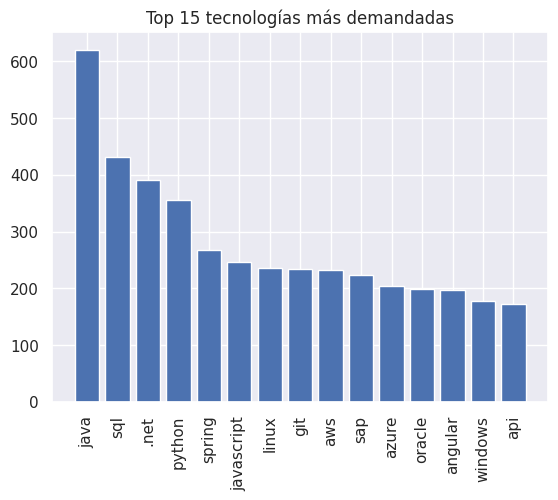

In [ ]:
# Convertir el string a lista con eval
df['Skills_list'] = df['Skills'].apply(eval)

# Aplanar todas las listas en una sola lista con comprensión
todas_techs = [tech for sublist in df['Skills_list'] for tech in sublist]

# Contar frecuencias manualmente con un diccionario
frecuencias = {}
for tech in todas_techs:
    if tech in frecuencias:
        frecuencias[tech] += 1
    else:
        frecuencias[tech] = 1

# Ordenar por frecuencia y tomar las 15 top
top15 = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)[:15]

# Graficar
import matplotlib.pyplot as plt

labels, values = zip(*top15)
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.title("Top 15 tecnologías más demandadas")
plt.show()


In [ ]:
for tech in sorted(set(todas_techs)):   # set elimina duplicados
    print(tech)

.net
2d
2mfa
365
3cx
3d
3dexperience
4d
4g
4gl
5g
5s
8d
@firma
\\xa0arcsight
\\xa0python
ab testing
abab
abap
abap fi
absis
access
acd
acdc
acrobat
acrobat reader dc
acronis
acs
active
active directory
ad
ada
adabas
adc
adfs
administration
adobe
adobe analytics
adobe campaign
adobe campaing
adobe experience manager
adobe framemaker
adobe illustrator
adobe ilustrator
adobe premiere
adobe suite
adobexd
ads
adwords
aem
aeroespacial
aeronautica
afm
after effects
agile
agile / scrum
ahrefs
ai
airflow
aiv
aix
ajax
akami waf
akka
alarma
alarmas
ale
alm
almacenamiento
almalinux
alomofire
alstom
altera
altium
altiuml
amazon
amazon ads
amazon quicksight
amazon web services
amfes
aml
analisis
analisis de datos
analisis funcional
analista funcional
analitica
analysis
android
android devices
android studio
angular
ans
ansible
ansys
antenas
antivirus kaspersky sophos
anydesk
aot
apache
apache airflow
apache cordova
apache kafka
apache spark
apex
api
aplicaciones legacy
apm server
appcenter
appdynami

# Preguntas Task 2.1
¿En cuántos anuncios se piden conocimientos de Python?

In [ ]:
sum(1 for tech in todas_techs if tech=='python')

355

In [ ]:
sum(1 for tech in todas_techs if tech=='phyton')    # Hay 6 casos en los que escribieron incorrectamente Python

6

In [ ]:
sum(1 for tech in todas_techs if tech=='py')        # Hay 2 casos en los que escribieron Python con abreviatura py

2

La respuesta que aparece entre las posibles soluciones de la pregunta tipo test es 355.

### Solución del profesor

In [ ]:
# creamos una columna nueva llamada 'skill_list'
df["skill_list"] = df['Skills'].str.strip("[]").str.replace(" ", "").str.replace("'", "").str.split(",")
print(type(df.skill_list[0]))
print(df.skill_list[0])
df.skill_list[0][0]     # comprobamos que podemos acceder a la primera tecnología de la primera fila

<class 'list'>
['machinelearning', 'bigdata', 'businessintelligence', 'python', 'sql', 'nlp', 'llm', 'git', 'aws']


'machinelearning'

### Solución alternativa del profesor (con ``applay``)

In [ ]:
df["skill_list_bis"] = df['Skills'].apply(lambda x: x[1:-1].replace(" ", "").replace("'", "").split(","))
print(type(df.skill_list_bis[0]))
print(df.skill_list_bis[0])
df.skill_list_bis[0][0]

<class 'list'>
['machinelearning', 'bigdata', 'businessintelligence', 'python', 'sql', 'nlp', 'llm', 'git', 'aws']


'machinelearning'

13761
1781


<Axes: >

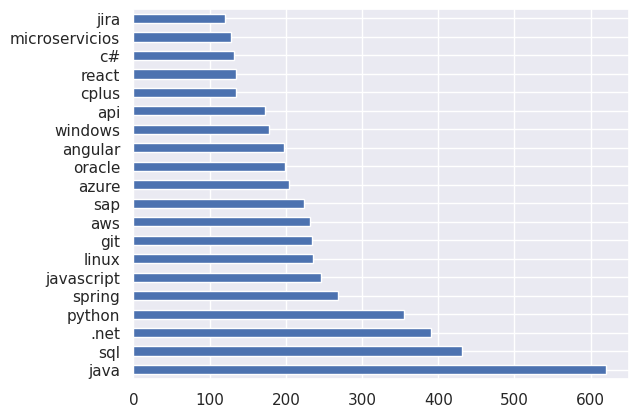

In [ ]:
flat_list = [item for sublist in df.skill_list for item in sublist]
print(len(flat_list))   # longitud de la flat_list con todas las repeticiones
print(len(set(flat_list)))  # tecnologías únicas
pd.Series(flat_list).value_counts()[:20].plot.barh()

### Otra solución alternativa (con `explode`)

In [ ]:
df["skill_list"].explode().value_counts()[:20]

,count
skill_list,
java,620
sql,431
.net,391
python,355
spring,268
javascript,246
linux,236
git,234
aws,232


### Explicación de ``
El método `explode()` de Pandas se utiliza para transformar cada elemento de una estructura tipo lista (list-like) que está dentro de una celda de un DataFrame o Serie en filas separadas.

### Uso general de `explode()`

- Si una columna de un DataFrame contiene listas o tuplas, `explode()` creará una fila por cada elemento de esas listas, replicando los valores de las demás columnas.
- Esto es útil para "desanidar" datos que están agrupados como listas en una sola celda y querer analizarlos individualmente.
- Si una lista está vacía, se convierte en `NaN` en la fila resultante.
- El índice original se replica para estas filas, pero se puede resetear para evitar índices repetidos.

Ejemplo simple:

```python
import pandas as pd

df = pd.DataFrame({
    'A': [[1, 2], [3, 4]],
    'B': ['x', 'y']
})

df_exploded = df.explode('A')
```

Resultado:

|   | A | B |
|---|---|---|
| 0 | 1 | x |
| 0 | 2 | x |
| 1 | 3 | y |
| 1 | 4 | y |

***

### En tu caso: `df["skill_list"].explode().value_counts()[:20]`

- `df["skill_list"]` es una columna donde cada fila contiene una lista de tecnologías (skills).
- `explode()` crea una fila por cada tecnología individual, descomponiendo las listas originales.
- Luego `.value_counts()[:20]` cuenta la cantidad de ocurrencias de cada tecnología y devuelve las 20 tecnologías más comunes.

Esto te permite saber cuáles son las tecnologías más demandadas en total, considerando todas las filas del DataFrame pero desglosando cada habilidad para contarla individualmente.

***

En resumen, `explode()` es fundamental cuando se analizan columnas con listas para convertir datos en formato "nested" (anidado) en formato tabular plano para análisis estadísticos o agrupaciones. Aquí facilita el conteo de tecnologías demandadas que aparecen en listas dentro de una sola columna.

### Explicación de `explode`
El método `explode()` de Pandas se utiliza para transformar cada elemento de una estructura tipo lista (list-like) que está dentro de una celda de un DataFrame o Serie en filas separadas.

### Uso general de `explode()`

- Si una columna de un DataFrame contiene listas o tuplas, `explode()` creará una fila por cada elemento de esas listas, replicando los valores de las demás columnas.
- Esto es útil para "desanidar" datos que están agrupados como listas en una sola celda y querer analizarlos individualmente.
- Si una lista está vacía, se convierte en `NaN` en la fila resultante.
- El índice original se replica para estas filas, pero se puede resetear para evitar índices repetidos.

Ejemplo simple:

```python
import pandas as pd

df = pd.DataFrame({
    'A': [[1, 2], [3, 4]],
    'B': ['x', 'y']
})

df_exploded = df.explode('A')
```

Resultado:

|   | A | B |
|---|---|---|
| 0 | 1 | x |
| 0 | 2 | x |
| 1 | 3 | y |
| 1 | 4 | y |

***

### En nuestro caso: `df["skill_list"].explode().value_counts()[:20]`

- `df["skill_list"]` es una columna donde cada fila contiene una lista de tecnologías (skills).
- `explode()` crea una fila por cada tecnología individual, descomponiendo las listas originales.
- Luego `.value_counts()[:20]` cuenta la cantidad de ocurrencias de cada tecnología y devuelve las 20 tecnologías más comunes.

Esto te permite saber cuáles son las tecnologías más demandadas en total, considerando todas las filas del DataFrame pero desglosando cada habilidad para contarla individualmente.

***

En resumen, `explode()` es fundamental cuando se analizan columnas con listas para convertir datos en formato "nested" (anidado) en formato tabular plano para análisis estadísticos o agrupaciones. Aquí facilita el conteo de tecnologías demandadas que aparecen en listas dentro de una sola columna.

# Preguntas Task 2.2
¿Cuál de las 50 tecnologías más demandas ofrece la mejor relación entre candidatos y ofertas?

- Tip: Search: pandas find string in column
- Posibles respuestas del test:
    - SAP
    - Azure
    - Javascript
    - Python

In [ ]:
skills_exploded = df.explode('skill_list')
top_skills = skills_exploded['skill_list'].value_counts().head(50).index

df_res = skills_exploded[skills_exploded['skill_list'].isin(top_skills)].groupby('skill_list').agg(
    Count=('skill_list', 'size'),
    Cand_mean=('Candidates', 'mean')
).reset_index()

df_res = df_res.sort_values(by='Count', ascending=False)

df_res.head(15)

,skill_list,Count,Cand_mean
22,java,620,52.750000
45,sql,431,29.422274
0,.net,391,42.585678
35,python,355,36.383099
44,spring,268,41.365672
23,javascript,246,86.934959
26,linux,236,43.483051
20,git,234,33.525641
4,aws,232,18.715517
39,sap,224,11.522321


In [ ]:
import pandas as pd

# Explode la lista de skills en filas individuales
skills_exploded = df.explode('skill_list')

# Selecciona las 50 tecnologías más frecuentes
top_skills = skills_exploded['skill_list'].value_counts().head(50).index

# Filtra solo las filas con esas tecnologías y agrupa por skill
df_res = skills_exploded[skills_exploded['skill_list'].isin(top_skills)].groupby('skill_list').agg(
    Count=('skill_list', 'size'),
    Cand_mean=('Candidates', 'mean')
).reset_index()

# Ordena por número de anuncios
df_res = df_res.sort_values(by='Count', ascending=False)

# Agrega columna con ratio candidatos por oferta
df_res['Ratio'] = df_res['Cand_mean'] / df_res['Count']

# Redondear Cand_mean a 1 decimal y Ratio a 2 decimales
df_res['Cand_mean'] = df_res['Cand_mean'].round(1)
df_res['Ratio'] = df_res['Ratio'].round(2)

# Ordena por Ratio de menor a mayor
df_res = df_res.sort_values(by='Ratio', ascending=True).reset_index(drop=True)

# Muestra las 15 tecnologías con mejor ratio
print(df_res.head(15))

   skill_list  Count  Cand_mean  Ratio
0         sap    224       11.5   0.05
1         sql    431       29.4   0.07
2         aws    232       18.7   0.08
3        java    620       52.8   0.09
4      python    355       36.4   0.10
5        .net    391       42.6   0.11
6      oracle    199       25.7   0.13
7         git    234       33.5   0.14
8      spring    268       41.4   0.15
9         api    173       26.2   0.15
10  marketing    110       17.4   0.16
11      azure    204       34.1   0.17
12      cobol     96       17.0   0.18
13      linux    236       43.5   0.18
14       data    104       20.7   0.20


### Respuesta a la pregunta tipo test
__SAP__

# Preguntas Task 2.3
¿Qué tecnologías aparecen en el cuadrante con más anuncios y menos candidatos?


* Crear un scatterplot para los 20 tecnologías con más ofertas, con la media de candidatos en el eje x, y el número de anuncios en el eje y. Divide la tabla en 4 sectores, dibujando una línea en el valor medio de las ofertas, y la media de las medias de los candidatos.

* Se trata de hacer un gráfico parecido al de la taréa 1.3.

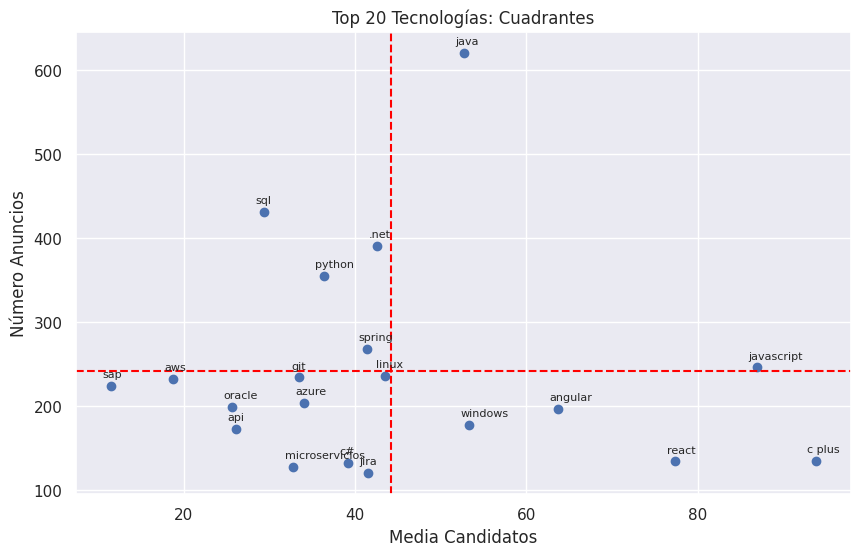

Tecnologías con MÁS anuncios y MENOS candidatos:
['sql', '.net', 'python', 'spring']


In [ ]:
# Top 20 tecnologías agrupadas
df_top20 = df.explode('Skills_list').groupby('Skills_list').agg(
    ads=('Skills_list', 'size'),
    candidates=('Candidates', 'mean')
).nlargest(20, 'ads')

# Medias para cuadrantes
mean_ads = df_top20['ads'].mean()
mean_candidates = df_top20['candidates'].mean()

# Scatterplot con cuadrantes
plt.figure(figsize=(10, 6))
plt.scatter(df_top20['candidates'], df_top20['ads'])
plt.axvline(mean_candidates, color='red', linestyle='--')
plt.axhline(mean_ads, color='red', linestyle='--')

# Etiquetas
for skill, row in df_top20.iterrows():
    plt.text(row['candidates'] - 1, row['ads'] + 10, skill, fontsize=8)

plt.xlabel('Media Candidatos')
plt.ylabel('Número Anuncios')
plt.title('Top 20 Tecnologías: Cuadrantes')
plt.show()

# Respuesta: cuadrante superior-izquierdo
respuesta = df_top20[(df_top20['ads'] > mean_ads) & (df_top20['candidates'] < mean_candidates)]
print("Tecnologías con MÁS anuncios y MENOS candidatos:")
print(respuesta.index.tolist())